# Introduction to Python utilities for LiPD files

### <font color='teal'>GraphMaker</font>


This module will teach you the basic utilities for LiPD files, including how to: 
- Read LiPD files 
- Extract timeseries objects 
- Filter Datasets
- Visualise Information 

To find the code.. access...
you can import your information on this module to create ... otherwise, you can find the code...

### The code


To see how the functions are created...

In [1]:
from src.my_functions import *
from src.dependencies import *

In [2]:
import lipd

#### Reading LiPD files 

You can find LiPD files from online data repositories, such as  [NOAA](https://www.ncei.noaa.gov/access/paleo-search/), [LinkedEarth Wiki](http://wiki.linked.earth/Main_Page) and [PANGAEA](https://www.pangaea.de/). 
You can either download them on your platform or access them through URLs.

To read the LiPD files, there are two important functions we need to learn:

<div class="alert alert-block alert-success">
<b>lipd.readLipd(usr_path=)</b> </div>

This function will read the LiPD files.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;usr_path: path to the file or directory 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Metadata


<div class="alert alert-block alert-success">
<b>lipd.extractTs(d, chron=False)</b> </div>

This function will create an array of dictionaries contained within variable d. These are the time series extracted from the LiPD files - each file can have multiple proxies that are measured, and therefore, multiple time series.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d (dict): Metadata  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;chron (bool): chronData time series

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Time series
    
**Example**
#CHNAGE TO A URL

In [3]:
path = 'C:/Users/anast/Desktop/DomeF.Uemura.2018.lpd' #Define the path to the file or directory - this file is available in the assignment 2 folder, under 
data = lipd.readLipd(usr_path = path)
ts = lipd.extractTs(data)

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: DomeF.Uemura.2018.lpd
Finished read: 1 record
extracting paleoData...
extracting: DomeF.Uemura.2018
Created time series: 14 entries


It will be useful here to print out the keys contained within one of the time series, to understand what we are dealing with a little bit better. You can do this using:

<div class="alert alert-block alert-success">
<b>lipd.viewTs(ts)</b> </div>

This function will return the contents of the time series defined above.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;usr_path: ts(dict): the time series entry

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; text

**Example**


In [4]:
lipd.viewTs(ts) #This will show the first entry

It looks like you input a full time series. It's best to view one entry at a time.
I'll show you the first entry...

ROOT
dataSetName : DomeF.Uemura.2018
archiveType : GlacierIce
lipdVersion : 1.3

PUBLICATION
pub1_author : Parrenin, F.; Dreyfus, G.; Durand, G.; Fujita, S.; Gagliardini, O.; Gillet, F.; Jouzel, J.; Kawamura, K.; Lhomme, N.; Masson-Delmotte, V.; Ritz, C.; Schwander, J.; Shoji, H.; Uemura, R.; Watanabe, O.; Yoshida, N.
pub1_title : 1-D-ice flow modelling at EPICA Dome C and Dome Fuji, East Antarctica
pub1_year : 2007
pub1_journal : Climate of the Past
pub1_issue : 2
pub1_volume : 3
pub1_doi : 10.5194/cp-3-243-2007
pub1_publisher : Copernicus GmbH
pub1_type : article-journal
pub1_pages : 243   259
pub1_citeKey : P8DGB5VT
pub2_author : Uemura, R.;Yoshida, N.;Kurita, N.;Nakawo, M.;Watanabe, O.
pub2_title : An observation-based method for reconstructing ocean surface changes using a 340,000-year deuterium excess record from the Dome Fuji ice core, Antarctica
pub2_year : 2004


#### Plotting
By looking at the output of the above function, we can now identify the variables we need for plotting the data series contained within the file. We can also display any time series that we need:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from  matplotlib.pyplot import figure


def make_plot(data):
    #Define variables
    year = data['age'] #note: these may also be saved as 'year' in certain files 
    # values = listToString(data['paleoData_values'])    
    values = np.sort(data['paleoData_values'])


    #Make the figure
    plt.plot(year,values)
    plt.title("Name: "+data['dataSetName']+", archive: "+data['archiveType'])
    plt.xlabel(data['ageUnits']) #Note! These may also be saved as 'yearUnits' in certain files 
    plt.ylabel(data['paleoData_variableName'])
    plt.gca().invert_xaxis() # Here, I have inverted the x-axis. This is just a preference and is optional.
    #plt.gca().invert_yaxis() # Here, I have inverted the y-axis. This is just a preference and is optional.

    return plt.show()

In [6]:
def final_plot(data):
    for data in ts: 
        if any (x in data["paleoData_variableName"] for x in {"age","depth","year"}): #removing these as they are not useful in this case
            continue 
        else:
            figure(figsize=(5, 10))
            make_plot(data)

In [7]:
# for key, value in data.items():
#     print(key, value)


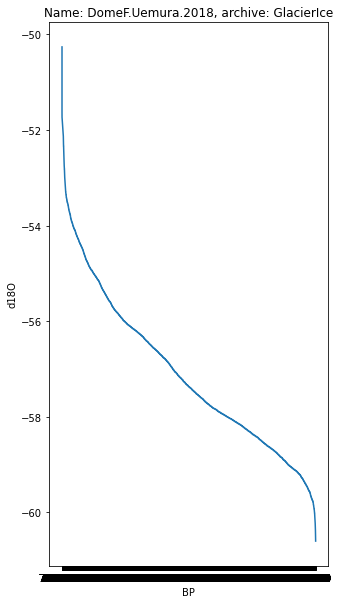

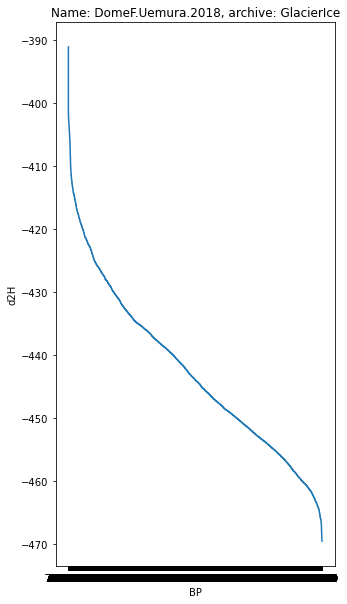

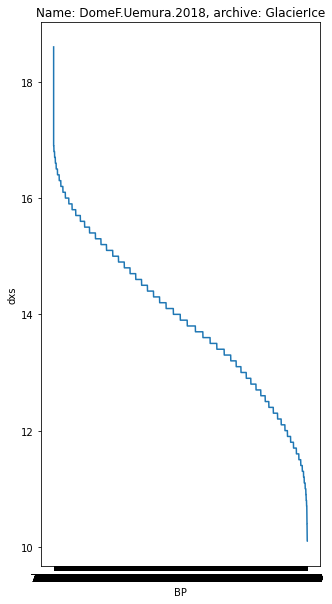

In [ ]:
final_plot(data)

In [ ]:
final_plot(data)

This works well when dealing with only one file, but becomes less useful when dealing with a large number of files. To better access information from large datasets, we can convert the data contained within the LiPD files into an Excel document.

There are some LiPD functions that can help us do this, but unfortunately, not every `Lipd` file will have been formatted in the same way, so there is some tweaking we need to do first.

The example below has been written to handle large datasets that contain the common errors, such as duplicate variables, but it is not exhaustive. If you find any more in your dataset, make sure to tweak the code to handle them.

#### Summarizing

Let's start by loading a large dataset:

In [ ]:
path = 'C:/Users/anast/Desktop/Aus_LiPD_data' #Define the path to the file or directory - this file is available in the assignment 2 folder, under 

data = lipd.readLipd(usr_path = path)
ts = lipd.extractTs(data)

Now, let's create a table to summarize our dataset.

In [ ]:
#Creating the table 
# import csv
# import pandas as pd
# def make_table(data):
#     header = ['Dataset Name', 'Archive Type', 'Proxy Type', 'Minimum Age', 'Maximum Age', 'Longitude', 'Latitude', 'Max Resolution', 'Min Resolution', ]

#     with open('data2.csv', 'w', encoding='UTF8', newline="") as f:
#         ana = csv.writer(f)
#         ana.writerow(header)

#         for item in ts: #naming the variable keys for table input   
#             archiveType = item["archiveType"] #archive type = material used 
#             name = item["dataSetName"]

#             if any(x in item["paleoData_variableName"] for x in {"Snow accumulation water equivalent", "Negative Data Error", "Positive Age Uncertainty", "qualityCode","Negative Age Uncertainty", "Positive Data Error","age", "sedimentWeight", "waterContent", "depth", "label", "year","uncertainty", "uncertaintyHigh", "uncertaintyLow", "Commentregardingreliability1", "reliable", "sampleID", "Laminae"}):
#                     continue #removing unwanted proxy types. Proxy types = what is measured 
#             else: proxyType = item["paleoData_variableName"]


#             if "age" in item: #minimum and maximum ages 
#                 min_age = min(map(float,item["age"]))
#                 max_age = max(map(float,item["age"]))
#             else:
#                 min_age = ""
#                 max_age = ""

#             geo_meanLon = item["geo_meanLon"] #location coordinates
#             geo_meanLat = item["geo_meanLat"]

#             if "paleoData_hasResolution_hasMaxValue" in item: #maximum resolution 
#                 resolution_max_value = item["paleoData_hasResolution_hasMaxValue"]
#                 if resolution_max_value == "nan":
#                     resolution_max_value = ""
#             else: 
#                 resolution_max_value = ""

#             if "paleoData_hasResolution_hasMinValue" in item: #minimum resolution
#                 resolution_min_value = float(item["paleoData_hasResolution_hasMinValue"])
#                 if resolution_min_value == float("nan"):
#                     resolution_min_value = ""
#             else:
#                 resolution_min_value = ""

#             data = [ #matching the variables defined above to the headers 
#                 name,
#                 archiveType,
#                 proxyType,
#                 min_age,
#                 max_age,
#                 geo_meanLon,
#                 geo_meanLat,
#                 resolution_max_value,
#                 resolution_min_value
#             ]
#             ana.writerow(data)
#         return pd.read_table('data2.csv', sep=',', index_col=0)

In [ ]:
make_table(data)

Looks good - but we are not done! There are more meaningful ways to display this data.

Let's start by plotting the data on a temporal scale:

#### Plotting


In [ ]:
#Creating the bar graph
import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = plt.axes()
plt.autoscale(True)
ax.yaxis.set_major_locator(ticker.NullLocator())


res = pd.read_table('data2.csv', sep=',')
res = res.drop_duplicates(subset=["Longitude", "Latitude"], keep="first") #This removes any duplicates (based on longitude and latitude)
# res = res.drop_duplicates(subset=["Minimum Age", "Maximum Age"], keep="first") #This removes any duplicates (based on age)

res = res.sort_values(["Latitude"]) #sorting the table by latitude - you can sort by any of the keys

# List of all archive types (there are more but they are variations of the below (e.g. 'lake sediment' and 'LakeSediment')
archive_types = ["Coral", "Lake Sediment", "Marine Sediment", "Tree", "Peat", "Sediment", "Leaf material", "Ostracod", "Foraminifera", "Speleothem"]

# def get_archive_num(archive_type): 
#     # Convert archive type to a number (used for coloring).
#     # Deal with duplicates, e.g. 'Lake Sediment' = 'lake sediment' = 'LakeSediment' = 1
#     for i, item in enumerate(archive_types):
#         if archive_type.lower().replace(" ","") == item.lower().replace(" ",""):
#             return i
        
#     # Special case
#     if archive_type.lower().replace(" ","") == "treering":
#         return archive_types.index("Tree")
#     raise ValueError(f"Unkown archive type: {archive_type}")


# colours: https://matplotlib.org/stable/tutorials/colors/colormaps.html
colors = plt.get_cmap('Set3').colors

for i in range(0, len(res)):
    x = [res["Minimum Age"].values[i], res["Maximum Age"].values[i]]
    y = [res["Dataset Name"].values[i] + str(i), res["Dataset Name"].values[i] + str(i)]
    archive_type = res["Archive Type"].values[i]
    if ((not numpy.isnan(x[0])) and (not numpy.isnan(x[1]))): 
        archive_type = res["Archive Type"].values[i]
        plt.plot(x, y, c=colors[get_archive_num(res["Archive Type"].values[i])], solid_capstyle='round')
     
        
plt.title("Age Ranges for Archive Data")
ax.set_facecolor("white")
# ax.set_xscale('log') #If you have data spanning hundreds of thousands of years, use a log scale.

# Create legend
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[get_archive_num(archive_type)], label=archive_type) for archive_type in archive_types]
ax.legend(handles=patches, bbox_to_anchor=(1.09, 0.8), loc='upper left', borderaxespad=0)
plt.xlim([0, 2022]) #I have set a limit on the axis, but you can modify this.

#Make the figure

plt.xlabel('year (CE)') 
plt.ylabel('Latitude')
plt.show()





In [ ]:
type(i)

#### Making a map 

Plotting the data on a spatial scale is just as useful for visualising.
In this example, we are using cartopy to make the map, which makes it easy to edit it whichever way you need. 

Guides on how to modify the map are available here: [scitools](https://scitools.org.uk/cartopy/docs/latest/getting_started/index.html).

In [ ]:
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pyplot as plt
# import sys
# from itertools import combinations
# from datetime import datetime
# import random
# import warnings

#Creating a map 
ax = plt.axes(projection = ccrs.PlateCarree())
plt.title('Distribution of Archive')
# ax.set_extent([100, 180, -60, 10], ccrs.PlateCarree())
ax.set_extent([100, 180, 10, -60], ccrs.PlateCarree())

ax.coastlines(resolution='110m')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
#Changing Axes
gl.top_labels = False
gl.left_labels = False
gl.xlines = True
gl.xlabel_style = {'size': 20, 'color': 'gray'}
gl.xlabel_style = {'color': 'blue', 'weight': 'bold'}


#Adding Features
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.5)
# ax.add_feature(cfeature.LAKES, color="lightblue")
# ax.add_feature(cfeature.RIVERS, edgecolor="lightblue")
# ax.stock_img() #to make realistic

colors = plt.get_cmap('Set3').colors


#adding points
df = pd.read_csv('data2.csv')
print(len(df.index))

point_cols = [colors[get_archive_num(archive_type)] for archive_type in df["Archive Type"]]

plt.scatter(x=df.Longitude, y=df.Latitude,
            color=point_cols,
            s=10,
            alpha=1,
            transform=ccrs.PlateCarree())
# print(len(df.index))

# Create legend
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[get_archive_num(archive_type)], label=archive_type) for archive_type in archive_types]
ax.legend(handles=patches, bbox_to_anchor=(1.2, 0.15), loc='lower left', borderaxespad=0)

plt.show()

If you're writing a paper, knowing how to make these figures will be useful :) 

#### Filtering

However, in paleoclimate research, scientists are usually interested in data from a particular temporal or spatial scale, so when dealing with large datasets it is important to know how to filter. We can do this easily using the following function:

<div class="alert alert-block alert-success">
<b>lipd.filterTs(ts, expression)</b> </div>

This function will filter the data and create a new time series accordingly.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; expression(Str): Extression  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ts(list): time series 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; new_ts(list): filtered time series 

**Example:** 

In [ ]:
ts = lipd.filterTs(ts, 'geo_meanLat < 0') #Filtering for files below 0 latitude (this covers Oceania)
ts = lipd.filterTs(ts, 'archiveType == marine sediment') #Filtering for archives 
ts = lipd.filterTs(ts, 'paleoData_variableName == mg/ca') #Filtering for proxies 

In [ ]:
final_plot(data)

next module...


add bibliograph, cartopy.